<h1> <center> ENSF 519.01 Applied Data Scince </center></h1>
<h2> <center> Assignment 1: Working with data (25 marks)</center></h2>
<h2> <center> Due: Friday Feb 2nd at 4pm. to be submitted on D2L </center></h2>
<h2> <center> <font color='red'>IMPORTANT NOTE: each task must be implemented exactly as asked, even if there are other easier or better solutions.</font> </center></h2>

Assume you are working as a data engineering intern for a news agancy. The project you are involved at requires some data collection, cleaning, and visualization, regarding top movies and directors from IMDB dataset, which you need to deliver in Parts A to E, in this assignment. 


<h1>Part A. Predict Oscar 2018's Nominees (5 marks)</h1>
<br>

Your duty starts with generating a list of potential nominees for best picture award at Oscar 2018, which are among movies that were produced in the last year(2017). The list should consist of the top rated movies based on people’s opinion. You can find the 2017 movies which were among the top 250 movies in the IMDB website. So you need to get the movie data first and then process them to generate the desired list.

To retrieve the data from IMDB you can use the following links that help you start working with imdb python API:
    
    to install imdb package see:
   <a href="https://imdbpy.sourceforge.io/">imdbpy.sourceforge.io/</a> 

    document:
   <a href="https://github.com/alberanid/imdbpy">github.com/alberanid/imdbpy</a> 
   
Or you can install imdb package on notebook by running the following cmd:

!pip install git+https://github.com/alberanid/imdbpy

<h2>Part A.1. Getting last year's top movies, using imdbpy API (3 marks)</h2>

In this section, using imdbpy API, NumPy and standard python, you should create a list of movies which were produced in the last year and were among the top 250 IMDB movies in the following format:

    [{'title': 'Coco', 'rating': 8.5, 'director': ['Lee Unkrich', 'Adrian Molina']}, {NEXT_MOVIE_DICTIONARY},...,{}] 
It means you should return a list of python dictionaries, where each dictionary stores a movie's title, rating and directors list. 

</br>
</br>
<font color='red'>Note: In this part you must properly use NumPy data structures and functions.</font>

In [1]:
## Part A.1. Solution
import numpy as np
from imdb import IMDb

# initialize IMDb
ia = IMDb()

# get top 250 movies of all time
top_250_movies = ia.get_top250_movies()

# filter for movies produced in 2017
top_2017 = np.array(list(filter(lambda m: m.get('year') == 2017, top_250_movies)))

# helper function to retrieve info given a movie ID
def get_movie_values(ID):
    movie = ia.get_movie(ID)
    return {
        'title': movie['title'],
        'rating': movie['rating'],
        'director': [d.get('name') for d in movie['director']]
    }

# clean up the list to only include 3 key/value pairs
top_2017_cleaned = np.array([get_movie_values(m.getID()) for m in top_2017])

print(top_2017_cleaned)

[ {'title': 'Coco', 'rating': 8.6, 'director': ['Lee Unkrich', 'Adrian Molina']}
 {'title': 'Three Billboards Outside Ebbing, Missouri', 'rating': 8.3, 'director': ['Martin McDonagh']}
 {'title': 'Blade Runner 2049', 'rating': 8.2, 'director': ['Denis Villeneuve']}
 {'title': 'Call Me by Your Name', 'rating': 8.3, 'director': ['Luca Guadagnino']}
 {'title': 'Logan', 'rating': 8.1, 'director': ['James Mangold']}
 {'title': 'Dunkirk', 'rating': 8.1, 'director': ['Christopher Nolan']}]


<h2>Part A.2. Python's "Filter" and "Lambda Functions" (2 marks)</h2>

The next step is to filter out movies with ratings less than 8.2. Use python's filter function on top of your Part A.1 list, to make a list of dictionaries(which represent movies) with rating>=8.2. 


In [2]:
## Part A.2. Solution

# filter for movies that have a rating >= 8.2
top_2017_highrating = np.array(list(filter(lambda m: m['rating'] >= 8.2, top_2017_cleaned)))

print(top_2017_highrating)

[ {'title': 'Coco', 'rating': 8.6, 'director': ['Lee Unkrich', 'Adrian Molina']}
 {'title': 'Three Billboards Outside Ebbing, Missouri', 'rating': 8.3, 'director': ['Martin McDonagh']}
 {'title': 'Blade Runner 2049', 'rating': 8.2, 'director': ['Denis Villeneuve']}
 {'title': 'Call Me by Your Name', 'rating': 8.3, 'director': ['Luca Guadagnino']}]


<h1>Part B. Web Scraping with BeautifulSoup (3 marks)</h1>

In this part you need to work with BeautifulSoup. 

The task is to find the best director of all times, based on the people's choice.

To get the required data you must first write a code to scrape the following webpage (Directors with the Most Films in the IMDb Top 250) and store the extracted table (directors names and their top films) in a Pandas dataframe: 

   <a href="http://www.imdb.com/list/ls033369077/">http://www.imdb.com/list/ls033369077/</a>  
        
You should store your table as follows: director_name, movie_title (e.g. for alfred hitchcock you should have the following rows in your Dataframe)

            Director_Name         Movie_Title
    0.    Alfred Hitchcock       Psycho (1960)
    1.    Alfred Hitchcock       Rear window (1954)
    2.    Alfred Hitchcock       North by northwest (1959)
    3.    Alfred Hitchcock       Vertigo (1958)
    4.    Alfred Hitchcock       Rebecca (1940)
    5.    Alfred Hitchcock       Dial m for murder (1954)
    6.    Alfred Hitchcock       Strangers on a train (1951)
    7.    Alfred Hitchcock       Notorious (1946)

<font color='red'>Reminder: use urllib.request and BeautifulSoup to read and parse the webpage data. BeautifulSoup needs to be installed first.</font>

In [3]:
## Part B. Solution

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import pandas as pd

# get list of directors
html = urlopen("http://www.imdb.com/list/ls033369077/")
soup = BeautifulSoup(html, "html.parser")
x = soup.find_all("h3", {"class": "lister-item-header"})
names = [e.get_text() for e in x]
directors = [re.sub(r"^\s\d*.\s*|\s*$", '', n) for n in names]

# get list of movie lists
y = soup.find_all("div", {"class": "list-description"})
movie_lists = [str(result).split('\n') for result in y]
for i,l in enumerate(movie_lists):
    for j,m in enumerate(l):
        if (j == 0):
            movie_lists[i][j] = "\n".join(m.split("<br/><br/>")[1:]).strip()
        else:
            movie_lists[i][j] = re.sub(r"<.*>$", "", m).strip()
            
# turn into a Pandas dataframe
directors_movies = []
for i,d in enumerate(directors):
    directors_movies.extend([{"Director_Name": d, "Movie_Title": m} for m in movie_lists[i]])

dir_mov_frame = pd.DataFrame(directors_movies)

# display result
display(dir_mov_frame)

,Director_Name,Movie_Title
0,Alfred Hitchcock,Psycho (1960)
1,Alfred Hitchcock,Rear Window (1954)
2,Alfred Hitchcock,North by Northwest (1959)
3,Alfred Hitchcock,Vertigo (1958)
4,Alfred Hitchcock,Rebecca (1940)
5,Alfred Hitchcock,Dial M for Murder (1954)
6,Alfred Hitchcock,Strangers on a Train (1951)
7,Alfred Hitchcock,Notorious (1946)
8,Christopher Nolan,The Dark Knight (2008)
9,Christopher Nolan,Inception (2010)


<h1>Part C. Working with Pandas (8 marks)</h1>

In this section, we continue using the scraped datset from Part B. to rank the best directors, in two steps:

<h2>Part C.1. Hadling Missing Data in Pandas (6 marks)</h2>
<br>
In this section, you need to add the "IMDB ID" and Production Year of each movie, as two new columns, to your (director,movie) dataframe from Part B.1.(You should use IMDBPY API to fetch the ID and the Year of each movie) <b>(1 mark)</b>


In [4]:
## Part C.1. Solution
## Adding "IMDB ID" and Production Year

# remove any text after the year (e.g. "co-director")
dir_mov_frame['IMDB ID'] = [ia.title2imdbID(t) for t in dir_mov_frame['Movie_Title'].str.replace(r"\).*$", ")")]
movie_years = []
movie_ratings = [] # get the ratings too since they are needed in Part E and this is a slow operation
for id in dir_mov_frame['IMDB ID']:
        if id:
            m = ia.get_movie_main(id)
            movie_years.append(m['data']['year'])
            movie_ratings.append(m['data']['rating'])
        else:
            movie_years.append(None)
            movie_ratings.append(None)
dir_mov_frame['Year'] = movie_years
dir_mov_frame['Rating'] = movie_ratings

# print the results
display(dir_mov_frame)

,Director_Name,Movie_Title,IMDB ID,Year,Rating
0,Alfred Hitchcock,Psycho (1960),0054215,1960.0,8.5
1,Alfred Hitchcock,Rear Window (1954),0047396,1954.0,8.5
2,Alfred Hitchcock,North by Northwest (1959),0053125,1959.0,8.4
3,Alfred Hitchcock,Vertigo (1958),0052357,1958.0,8.4
4,Alfred Hitchcock,Rebecca (1940),0032976,1940.0,8.2
5,Alfred Hitchcock,Dial M for Murder (1954),0046912,1954.0,8.2
6,Alfred Hitchcock,Strangers on a Train (1951),0044079,1951.0,8.0
7,Alfred Hitchcock,Notorious (1946),0038787,1946.0,8.0
8,Christopher Nolan,The Dark Knight (2008),0468569,2008.0,9.0
9,Christopher Nolan,Inception (2010),1375666,2010.0,8.8


You will see that some entries have missing IDs.
- Explian why this has happened. <b>(1 mark)</b>

<h3> your answer:</h3>

IMDB's title2imdbID method is looking for an exact string match. Not every string that is sent to the API will return a value. Perhaps the title is slightly different, there is garbage in the data (I did try to remove it all) or the movie simply does not exist in the database.

- Provide two solutions to solve this: 
a)  by ignoring the movies that are missing IDs <b>(1 mark)</b> 

In [5]:
## Part C.1. Solution cont.
## Part C.1.a) ignoring the movies that are missing IDs 

print("I already did this in my original solution:")
print("If I tried to make a call to get_movie(id) when id was `None` it would fail, so I filtered out the missing IDs")

print("\nTo be thorough, I will now remove any rows with `None` or `NaN` from the data set")

dir_mov_frame = dir_mov_frame.dropna()
display(dir_mov_frame)

I already did this in my original solution:
If I tried to make a call to get_movie(id) when id was `None` it would fail, so I filtered out the missing IDs

To be thorough, I will now remove any rows with `None` or `NaN` from the data set


,Director_Name,Movie_Title,IMDB ID,Year,Rating
0,Alfred Hitchcock,Psycho (1960),0054215,1960.0,8.5
1,Alfred Hitchcock,Rear Window (1954),0047396,1954.0,8.5
2,Alfred Hitchcock,North by Northwest (1959),0053125,1959.0,8.4
3,Alfred Hitchcock,Vertigo (1958),0052357,1958.0,8.4
4,Alfred Hitchcock,Rebecca (1940),0032976,1940.0,8.2
5,Alfred Hitchcock,Dial M for Murder (1954),0046912,1954.0,8.2
6,Alfred Hitchcock,Strangers on a Train (1951),0044079,1951.0,8.0
7,Alfred Hitchcock,Notorious (1946),0038787,1946.0,8.0
8,Christopher Nolan,The Dark Knight (2008),0468569,2008.0,9.0
9,Christopher Nolan,Inception (2010),1375666,2010.0,8.8


and b)  by fixing your script to find the correct IDs using string manipulation. <b>(2 mark)</b>



In [6]:
## Part C.1. Solution cont.
## Part C.1.b) fixing your script to find the correct IDs using string manipulation 

print("I already did this in my original solution:")
print("Some of my movies had \"(co-director)\" in the title so I removed it, since I knew that wouldn't be valid")
print("I've been cleaning my data as I go to a reasonable level. I don't know what more I can do, especially when movies such as \"Inside Out (2015)\" refuse to return an ID - nothing seems wrong with that title.")

I already did this in my original solution:
Some of my movies had "(co-director)" in the title so I removed it, since I knew that wouldn't be valid
I've been cleaning my data as I go to a reasonable level. I don't know what more I can do, especially when movies such as "Inside Out (2015)" refuse to return an ID - nothing seems wrong with that title.


Finally set the dataframe's index as the IMDB IDs. <b>(1 mark)</b>

In [7]:
## Part C.1. Solution cont.
## set index

# print results
dir_mov_frame.set_index('IMDB ID')

,Director_Name,Movie_Title,Year,Rating
IMDB ID,,,,
0054215,Alfred Hitchcock,Psycho (1960),1960.0,8.5
0047396,Alfred Hitchcock,Rear Window (1954),1954.0,8.5
0053125,Alfred Hitchcock,North by Northwest (1959),1959.0,8.4
0052357,Alfred Hitchcock,Vertigo (1958),1958.0,8.4
0032976,Alfred Hitchcock,Rebecca (1940),1940.0,8.2
0046912,Alfred Hitchcock,Dial M for Murder (1954),1954.0,8.2
0044079,Alfred Hitchcock,Strangers on a Train (1951),1951.0,8.0
0038787,Alfred Hitchcock,Notorious (1946),1946.0,8.0
0468569,Christopher Nolan,The Dark Knight (2008),2008.0,9.0


<h2>Part C.2. Groupby in Pandas (2 marks)</h2>

<br>
Finally, you need to count the number of movies per director, in the generated dataframe from Part C.1., and then sort the table based on the number of movies and print the head() of the list.

In [8]:
## Part C.2. Solution.

mov_count_frame = pd.DataFrame(dir_mov_frame.groupby("Director_Name").size()).reset_index()
mov_count_frame = mov_count_frame.rename(index=str, columns={0: "Movie_Count"})
mov_count_frame.sort_values(["Movie_Count", "Director_Name"], ascending=[False, True], inplace=True)
mov_count_frame = mov_count_frame.reset_index(drop=True)

# print the first 5 directors (I assumed we want the directors with the most movies first)
display(mov_count_frame.head())

,Director_Name,Movie_Count
0,Alfred Hitchcock,8
1,Christopher Nolan,7
2,Martin Scorsese,7
3,Steven Spielberg,7
4,Akira Kurosawa,5


<h1>Part D. Merging DataFrames (4 marks)</h1>

In this part, we want to find out if any of the directors that we have in our list of best directors, in Part C.2., has produced any movie in 2017 that is also in our list of nominees from Part A.2. To do so you need to make a new dataframe from the table that you had in part A.2. The new dataframe keeps a separate entry for each movie per director, if the movie has more than one director. This means that you should split the rows which have several directors to several rows. <b>(2 marks)</b>

For example, this row {'title': 'Coco', 'rating': 8.5, 'director': ['Lee Unkrich', 'Adrian Molina']} becomes the following two rows:

0  8.5  coco  Lee  Unkrich  

1  8.5  coco  Adrian  Molina  



In [9]:
## Part D Solution.
## Creating the new DataFrame

# process list of nominees from A.2 into a frame
nominees = pd.DataFrame([{'title': m['title'], 'rating': m['rating'], 'director': d} for m in top_2017_highrating for d in m['director']])
display(nominees)

,director,rating,title
0,Lee Unkrich,8.6,Coco
1,Adrian Molina,8.6,Coco
2,Martin McDonagh,8.3,"Three Billboards Outside Ebbing, Missouri"
3,Denis Villeneuve,8.2,Blade Runner 2049
4,Luca Guadagnino,8.3,Call Me by Your Name


Now to find out if any of the best directors has produced a movie this year which is among top250, you need to perform a merge operation on the dataframe that you just generated and the dataframe that you have from part C.2. <b>(2 marks)</b>

Your code should return a Pandas series of directors. 

In [10]:
## Part D Solution cont.
## Merging

# find the best directors which have produced a movie this year among the top 250
director_series = pd.merge(nominees, mov_count_frame, left_on="director", right_on="Director_Name")['director']

# print results
display(director_series)

0    Lee Unkrich
Name: director, dtype: object

<h1>Part E. Visualization - Using Mathplotlib (5 marks)</h1>

In this part we want to generate some Basic visualization of the data that we collected in the previous parts.


<h2>Part E.1 Barplot (2 marks) </h2>
<br>
Using matplotlib, draw a barplot that shows the number of movies that were among the top250 in each year.

To do so, you should first generate a dataframe that stores information about the imdb top250 movies as their title, year of production, and rate of imdb. Then using groupyby you create a new dataframe which aggregates the number of movies per year, as follows, where "rating" is the mean of all movies, per year:

                           year  rating  count
                        0  1921    8.30      1
                        1  1925    8.20      1
                        2  1926    8.10      1
                        3  1927    8.15      2
                        4  1928    8.10      1

Note that barplot's X-axis shows the years and Y-axis shows the number of movies in each year which were among the imdb top250 movies.

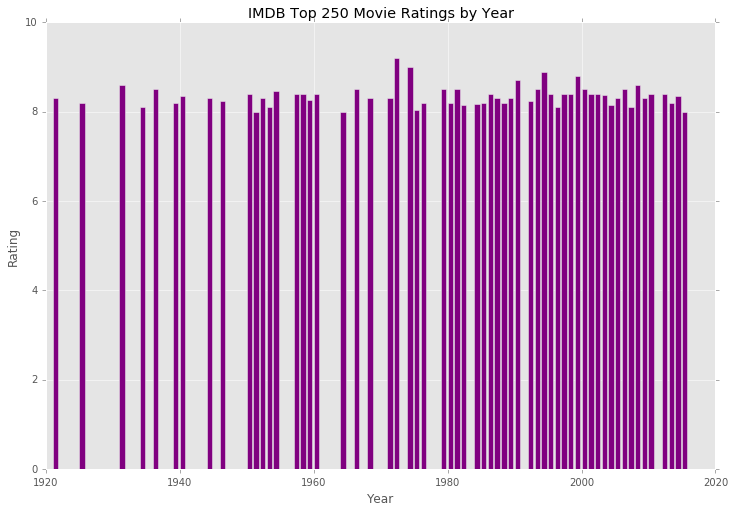

      Year    Rating  Count
0   1921.0  8.300000      1
1   1925.0  8.200000      1
2   1931.0  8.600000      1
3   1934.0  8.100000      1
4   1936.0  8.500000      1
5   1939.0  8.200000      1
6   1940.0  8.350000      2
7   1944.0  8.300000      1
8   1946.0  8.233333      3
9   1950.0  8.400000      2
10  1951.0  8.000000      1
11  1952.0  8.300000      1
12  1953.0  8.100000      1
13  1954.0  8.466667      3
14  1957.0  8.400000      5
15  1958.0  8.400000      1
16  1959.0  8.266667      3
17  1960.0  8.400000      2
18  1964.0  8.000000      1
19  1966.0  8.500000      2
20  1968.0  8.300000      1
21  1971.0  8.300000      1
22  1972.0  9.200000      1
23  1974.0  9.000000      1
24  1975.0  8.033333      3
25  1976.0  8.200000      2
26  1979.0  8.500000      2
27  1980.0  8.200000      1
28  1981.0  8.500000      1
29  1982.0  8.150000      2
30  1984.0  8.166667      3
31  1985.0  8.200000      1
32  1986.0  8.400000      1
33  1987.0  8.300000      1
34  1988.0  8.200000

In [121]:
# Part E.1 Solution
# Barplot code
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# get the movie count for each year
year_counts_frame = pd.DataFrame(dir_mov_frame.groupby("Year").size()).reset_index()
year_counts_frame = year_counts_frame.rename(index=str, columns={0: "Count"})

# get the mean rating for each year
mean_rating_frame = pd.DataFrame(dir_mov_frame.groupby("Year")['Rating'].mean()).reset_index()

# merge the two frames into one
barplot_frame = pd.merge(mean_rating_frame, year_counts_frame, on="Year")

# generate and render a plot
x = barplot_frame["Year"]
y = barplot_frame["Rating"]
width = 0.8
f, ax = plt.subplots(figsize=(12, 8))
plt.style.use('ggplot')
ax.bar(x, y, width, color='purple')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_ylabel('Rating')
ax.set_xlabel('Year')
ax.set_title('IMDB Top 250 Movie Ratings by Year')
plt.show()

# display the raw data
print(barplot_frame)

<h2>Part E.2 BoxPlot (3 marks)</h2>

In this section, using boxplot, we want to visualize the distribution of Production Years for movies in the Part C.2. table, per director. The X-axis should represent the top 5 directors (as listed by head() in Part C.2). Use Directors' last names as the lables. The Y-axis represents the Production Year. Each Boxplot represents the distribution of product Year, per director.

<font color='red'>Note: In this section you can only use matplotlib to draw the plot</font>

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


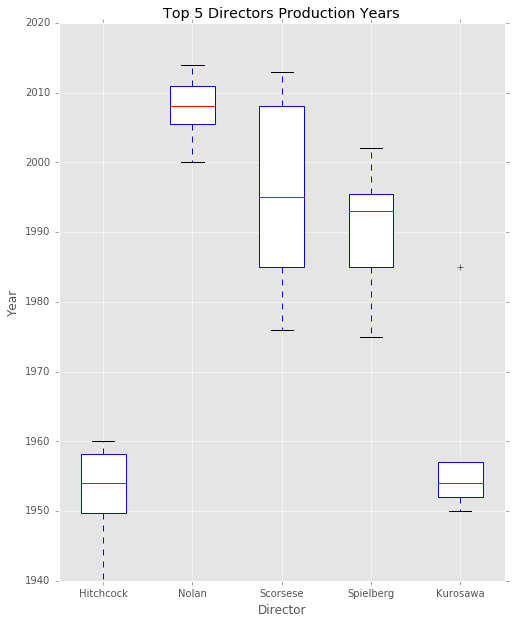

In [144]:
# Part E.2 Solution
# Boxplot code

# set up frame listing movies of top 5 directors
boxplot_frame = pd.merge(mov_count_frame.head(), dir_mov_frame, on="Director_Name")

# get distribution of years for each director
dataset = []
directors = []
for director in mov_count_frame.head()["Director_Name"]:
    directors.append(director.split(" ")[1])
    years = boxplot_frame.loc[boxplot_frame["Director_Name"] == director]["Year"]
    dataset.append(years)

# create box plot
f, ax = plt.subplots(figsize=(8, 10))
ax.set_title('Top 5 Directors Production Years')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_ylabel('Year')
ax.set_xlabel('Director')
ax.boxplot(dataset, labels=directors, patch_artist=True)

# render boxplot
plt.show()